<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/week6/digit_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Data***

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive",force_remount=True)
path="/content/drive/My Drive/data/digit.csv"
df =pd.read_csv(path)
data=pd.read_csv(path,header=None)


Mounted at /content/drive


# Try to predict using simple MLP

In [ ]:
X = data.values

from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test=train_test_split(X[:,:784],X[:,784],test_size=0.2,random_state=20)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1,verbose=1)
mlp.fit(X_train, Y_train)


Iteration 1, loss = 28.10077002
Iteration 2, loss = 18.78900480
Iteration 3, loss = 11.97624402
Iteration 4, loss = 8.83116308
Iteration 5, loss = 5.93362146
Iteration 6, loss = 4.26195395
Iteration 7, loss = 2.80468094
Iteration 8, loss = 1.77304747
Iteration 9, loss = 1.03039756
Iteration 10, loss = 0.58818467
Iteration 11, loss = 0.29507789
Iteration 12, loss = 0.17546472
Iteration 13, loss = 0.14242159
Iteration 14, loss = 0.12819588
Iteration 15, loss = 0.08097133
Iteration 16, loss = 0.02248117
Iteration 17, loss = 0.00693713
Iteration 18, loss = 0.00246614
Iteration 19, loss = 0.00054509
Iteration 20, loss = 0.00083755
Iteration 21, loss = 0.00065466
Iteration 22, loss = 0.00025502
Iteration 23, loss = 0.00022308
Iteration 24, loss = 0.00019881
Iteration 25, loss = 0.00017117
Iteration 26, loss = 0.00011067
Iteration 27, loss = 0.00008811
Iteration 28, loss = 0.00007421
Iteration 29, loss = 0.00006648
Iteration 30, loss = 0.00006169
Iteration 31, loss = 0.00005881
Iteration 32, 

MLPClassifier(random_state=1, verbose=1)

Show score of the prediction

In [ ]:
print('The score for training data is', mlp.score(X_train,Y_train))
print('The score for test data is',mlp.score(X_test,Y_test))

The score for training data is 1.0
The score for test data is 0.74


In [ ]:
print('Data Size', X.shape)

Data Size (500, 785)


### PCA

In [ ]:
import numpy as np


X_std=X[:,:-1]
mean_vec = np.mean(X_std, axis=0)



In [ ]:

X_std.shape

(500, 784)

Covariance matrix 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
NumPy covariance matrix: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


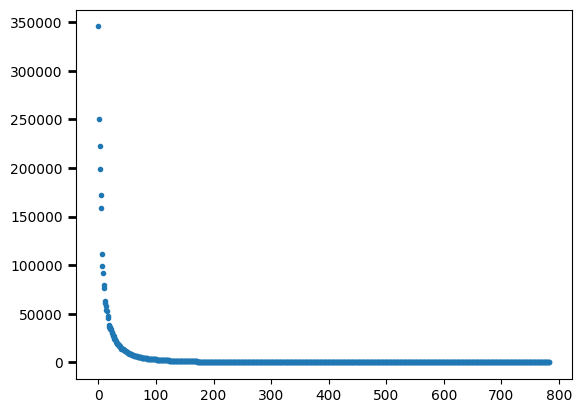

In [ ]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))
cov_mat = np.cov(X_std.T)
from numpy import linalg as LA
values, vectors = LA.eig(cov_mat)

import matplotlib.pyplot as plt
plt.plot(np.sort(values)[::-1],'.')
plt.tick_params(axis='y',length=6, width=2)

In [ ]:
values

array([ 3.45461478e+05+0.00000000e+00j,  2.50042108e+05+0.00000000e+00j,
        2.22144040e+05+0.00000000e+00j,  1.98563320e+05+0.00000000e+00j,
        1.72166123e+05+0.00000000e+00j,  1.59213226e+05+0.00000000e+00j,
        1.11376781e+05+0.00000000e+00j,  9.94514906e+04+0.00000000e+00j,
        9.23693820e+04+0.00000000e+00j,  7.98787019e+04+0.00000000e+00j,
        7.70032706e+04+0.00000000e+00j,  6.27997913e+04+0.00000000e+00j,
        6.10981423e+04+0.00000000e+00j,  5.76338311e+04+0.00000000e+00j,
        5.36082493e+04+0.00000000e+00j,  5.25869858e+04+0.00000000e+00j,
        4.73179496e+04+0.00000000e+00j,  4.60612387e+04+0.00000000e+00j,
        3.85063709e+04+0.00000000e+00j,  3.60826798e+04+0.00000000e+00j,
        3.63963465e+04+0.00000000e+00j,  3.47309410e+04+0.00000000e+00j,
        3.40837458e+04+0.00000000e+00j,  3.14690931e+04+0.00000000e+00j,
        2.98153236e+04+0.00000000e+00j,  2.81911718e+04+0.00000000e+00j,
        2.71305237e+04+0.00000000e+00j,  2.67216636

You can find Covariance matrix manually or use Library

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
X_new=pca.fit_transform(X_std)
eig_vals=pca.explained_variance_

print('Eigenvectors \n%s' %pca)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
PCA(n_components=0.95)

Eigenvalues 
[345461.47812618 250042.1076638  222144.04019841 198563.31989173
 172166.12259708 159213.2261283  111376.78115598  99451.49059151
  92369.38200562  79878.70193572  77003.27055431  62799.79128478
  61098.14234933  57633.83112974  53608.24933423  52586.98577648
  47317.9495977   46061.2386965   38506.37088837  36396.34648642
  36082.67975417  34730.94100679  34083.74576035  31469.09314083
  29815.32361248  28191.17179626  27130.52366731  26721.66358086
  24383.62134238  23889.75530367  22362.53656761  21442.35883883
  19975.33515133  18976.7397448   18785.34588143  17677.40496539
  17203.95784605  16661.71538269  16349.86501195  15016.11022748
  14215.6209982   14065.90284823  13976.49130551  13409.05042521
  12749.90260065  12363.01313157  12098.36077756  11873.81919225
  11638.24003423  10824.04498684  10428.15086058   9920.32856987
   9691.88373752   9387.66095846   9125.75567998   8982.28587021
   8652.07782825   8382.1849651    7883

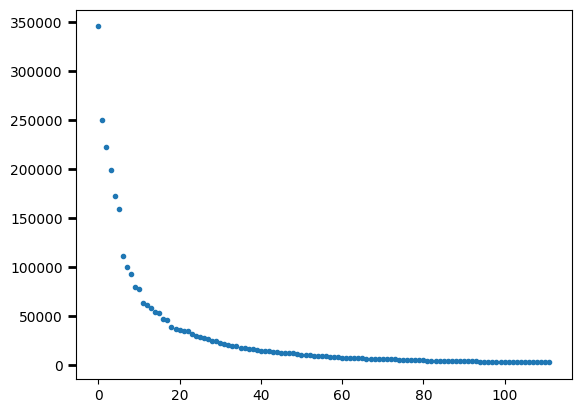

In [ ]:
import matplotlib.pyplot as plt
plt.plot(eig_vals,'.')
plt.tick_params(axis='y',length=6, width=2)

In [ ]:
plt.show()

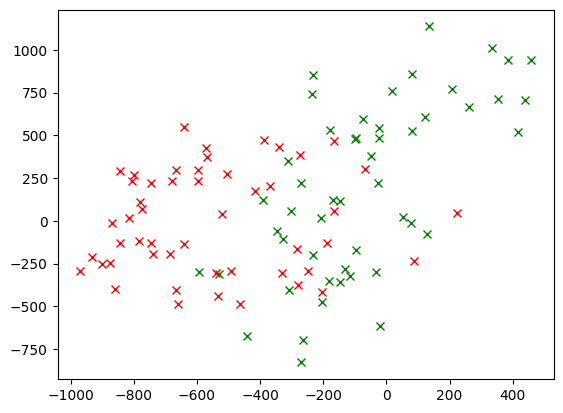

In [ ]:
eig_vecs=pca.components_
Projdata=np.dot((X_std-mean_vec),eig_vecs.T)
plt.clf()

digit=np.arange(50)

plt.plot(Projdata[digit,1],Projdata[digit,2],'x',color='g')
digit=digit+200
plt.plot(Projdata[digit,1],Projdata[digit,2],'x',color='r')

plt.show()

import matplotlib.pyplot as plt


Projdata50=np.dot((X_std-).T,eig_vecs[:,1:51])

size(Projdata50)

In [ ]:
import matplotlib.pyplot as plt

Projdata50=np.dot((X_std-mean_vec).T,eig_vecs[:,:400])



In [ ]:
recon50=np.dot(eig_vecs[:,:400], Projdata50.T)
recon50.shape

(500, 784)

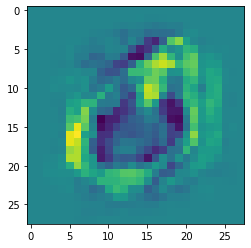

In [ ]:
plt.imshow(np.reshape(recon50[1],[28,28]))
plt.show()

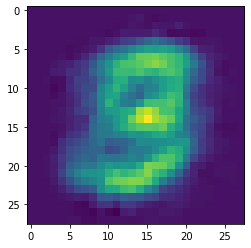

In [ ]:
Projdata100=np.dot((X_std-mean_vec).T,eig_vecs[:,1:101])
recon100=np.dot(eig_vecs[:,1:101], Projdata100.T)+mean_vec
plt.imshow(np.reshape(recon100[266,:],[28,28]))
plt.show()

In [ ]:
eig_vecs.sort

<function ndarray.sort>

In [ ]:
print(eig_vecs)

[[ 0.00000000e+00  1.11022302e-16  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.93889390e-18 -2.42861287e-17  4.16333634e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.71445147e-17  2.08166817e-17 -6.93889390e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 5.15116649e-15 -1.07406488e-15 -1.28734371e-14 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-2.97767995e-15  1.08191451e-14  2.40665235e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.85032395e-01 -8.63266167e-02 -3.69097110e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:


# This is an extremely inefficient function.
def pca_com(com, images):
    # percentage should be a decimal from 0 to 1
    pca = PCA(n_components=com)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

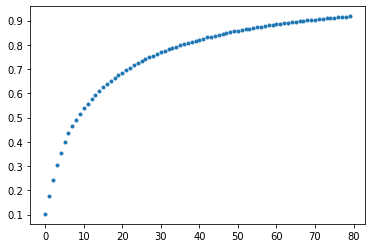

In [ ]:
pca = PCA(n_components=80)
pca.fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.')
plt.show()

<Figure size 432x288 with 0 Axes>

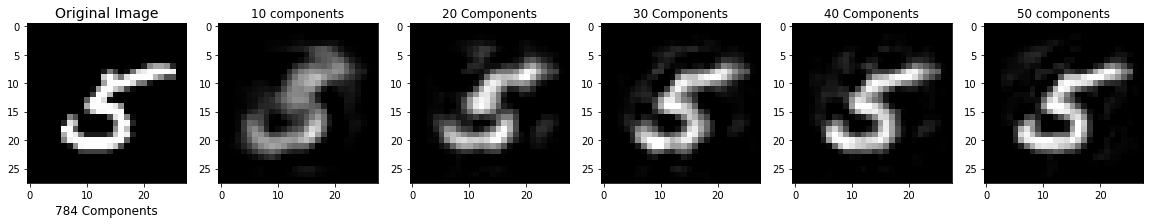

In [ ]:
plt.clf()
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 6, 1);
plt.imshow(X_std[260,:].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);


# 10 principal components
plt.subplot(1, 6, 2);
plt.imshow(pca_com(10, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('10 components', fontsize = 12);



# 20 principal components
plt.subplot(1, 6, 3);
plt.imshow(pca_com(20, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('20 Components', fontsize = 12)


# 30 principal components
plt.subplot(1, 6, 4);
plt.imshow(pca_com(30, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('30 Components', fontsize = 12)


# 40 principal components
plt.subplot(1, 6, 5)
plt.imshow(pca_com(40, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('40 Components', fontsize = 12)

# 50 principal components
plt.subplot(1, 6, 6);
plt.imshow(pca_com(50, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('50 components', fontsize = 12);
plt.show()



In [ ]:
pca = PCA(.99)
pca.fit(X_std)

PCA(n_components=0.99)

In [ ]:
pca.n_components_

227

In [ ]:
pca_com

<function __main__.pca_com>

<Figure size 432x288 with 0 Axes>

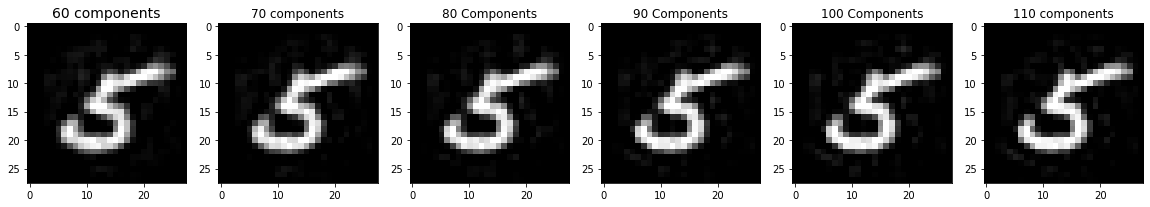

In [ ]:
plt.clf()
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 6, 1);
plt.imshow(pca_com(60, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));

plt.title('60 components', fontsize = 14);


# 10 principal components
plt.subplot(1, 6, 2);
plt.imshow(pca_com(70, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('70 components', fontsize = 12);



# 20 principal components
plt.subplot(1, 6, 3);
plt.imshow(pca_com(80, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('80 Components', fontsize = 12)


# 30 principal components
plt.subplot(1, 6, 4);
plt.imshow(pca_com(90, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('90 Components', fontsize = 12)


# 40 principal components
plt.subplot(1, 6, 5)
plt.imshow(pca_com(100, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('100 Components', fontsize = 12)

# 50 principal components
plt.subplot(1, 6, 6);
plt.imshow(pca_com(110, X_std)[260].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('110 components', fontsize = 12);
plt.show()



In [ ]:
pca = PCA(200)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)


In [ ]:
mlp2 = MLPClassifier(random_state=1,verbose=1)
mlp2.fit(X_train_new, Y_train)

Iteration 1, loss = 30.98736973
Iteration 2, loss = 29.06021185
Iteration 3, loss = 27.06103772
Iteration 4, loss = 24.20088463
Iteration 5, loss = 21.08031822
Iteration 6, loss = 17.56223381
Iteration 7, loss = 14.95819889
Iteration 8, loss = 12.51230353
Iteration 9, loss = 10.27408407
Iteration 10, loss = 8.17510968
Iteration 11, loss = 5.91756687
Iteration 12, loss = 4.29723567
Iteration 13, loss = 3.05059675
Iteration 14, loss = 2.10078368
Iteration 15, loss = 1.59403163
Iteration 16, loss = 0.85473106
Iteration 17, loss = 0.54911350
Iteration 18, loss = 0.33633161
Iteration 19, loss = 0.26187233
Iteration 20, loss = 0.24064005
Iteration 21, loss = 0.15865567
Iteration 22, loss = 0.09359547
Iteration 23, loss = 0.00076751
Iteration 24, loss = 0.00044050
Iteration 25, loss = 0.00038199
Iteration 26, loss = 0.00027986
Iteration 27, loss = 0.00010520
Iteration 28, loss = 0.00007687
Iteration 29, loss = 0.00006821
Iteration 30, loss = 0.00005800
Iteration 31, loss = 0.00005412
Iteratio

MLPClassifier(random_state=1, verbose=1)

In [ ]:
print('The score for training data is', mlp2.score(X_train_new,Y_train))
print('The score for test data is',mlp2.score(X_test_new,Y_test))

The score for training data is 1.0
The score for test data is 0.72


In [ ]:
X_train_new.shape

(400, 50)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X_train_new_std= scaler2.fit_transform(X_train_new)
X_test_new_std= scaler2.transform(X_test_new)

mlp4 = MLPClassifier(random_state=1,verbose=0)
mlp4.fit(X_train_new_std, Y_train)
print('The score for training data is', mlp4.score(X_train_new_std,Y_train))
print('The score for test data is',mlp4.score(X_test_new_std,Y_test))

The score for training data is 1.0
The score for test data is 0.64


In [ ]:
scaler = StandardScaler()
X_train_std= scaler.fit_transform(X_train)
X_test_std= scaler.transform(X_test)

mlp3 = MLPClassifier(random_state=1,verbose=0)
mlp3.fit(X_train_std, Y_train)
print('The score for training data is', mlp3.score(X_train_std,Y_train))
print('The score for test data is',mlp3.score(X_test_std,Y_test))

The score for training data is 1.0
The score for test data is 0.82
